In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997
2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995
2015-01-09,209.979996,204.960007,208.919998,206.660004,4668300,206.660004
2015-01-12,204.470001,199.250000,203.050003,202.210007,5950300,202.210007
2015-01-13,207.610001,200.910004,203.320007,204.250000,4477300,204.250000
2015-01-14,195.199997,185.000000,185.830002,192.690002,11551900,192.690002


First, we need proper OHLC data. Our current data does have OHLC values, and, unless I am mistaken, Tesla has never had a split, but you wont always be this lucky. Thus, we're going to create our own OHLC data, which will also allow us to show another data transformation that comes from Pandas:

In [2]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()

In [3]:
df_volume = df['Volume'].resample('10D').sum()
df_volume

Date
2015-01-02     27474000
2015-01-12     39455400
2015-01-22     23275700
2015-02-01     27910500
2015-02-11     49439100
2015-02-21     37290000
2015-03-03     41684300
2015-03-13     33522800
2015-03-23     43655500
2015-04-02     35985100
2015-04-12     18857400
2015-04-22     45589700
2015-05-02     35298800
2015-05-12     31980700
2015-05-22     16566600
2015-06-01     22979600
2015-06-11     18395900
2015-06-21     24097600
2015-07-01     31658200
2015-07-11     18488100
2015-07-21     27692100
2015-07-31     33040100
2015-08-10     36208800
2015-08-20     43537600
2015-08-30     25806400
2015-09-09     26041000
2015-09-19     24508100
2015-09-29     39492100
2015-10-09     25449300
2015-10-19     38259500
                ...    
2019-05-21    107580800
2019-05-31     87035100
2019-06-10     84634100
2019-06-20     53696800
2019-06-30     50835100
2019-07-10     66587300
2019-07-20     64657600
2019-07-30     54326500
2019-08-09     36230900
2019-08-19     46020300
2019-08-29 

In [4]:
print(df_ohlc.head())


                  open        high         low       close
Date                                                      
2015-01-02  219.309998  219.309998  206.660004  206.660004
2015-01-12  202.210007  204.250000  191.869995  196.570007
2015-01-22  201.619995  206.550003  199.369995  203.600006
2015-02-01  210.940002  220.990005  210.940002  216.289993
2015-02-11  212.800003  217.110001  202.880005  217.110001


That's expected, but, we want to now move this information to matplotlib, as well as convert the dates to the mdates version. Since we're just going to graph the columns in Matplotlib, we actually don't want the date to be an index anymore, so we can do:

In [5]:
df_ohlc = df_ohlc.reset_index()


C:\Users\ankur\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


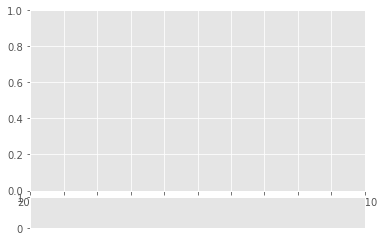

In [6]:
# Now we're going to setup the figure:

fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()

In [ ]:
pip install mpl_finance

In [ ]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [ ]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [ ]:
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')

In [ ]:
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()